<a href="https://colab.research.google.com/github/nandaniluitel/BigData/blob/main/mousechallange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "/content/drive/MyDrive/challange /Downloads/module_5_starter_code/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/content/drive/MyDrive/challange /Downloads/module_5_starter_code/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [9]:
# prompt: Combine the data into a single dataset

import pandas as pd
# Combine the data into a single dataset
mouse_study_df = pd.merge(study_results,mouse_metadata,  how="left", on="Mouse ID")



In [8]:
# prompt:  Display the data table for preview

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
# prompt: Checking the number of mice.

# Checking the number of mice.
number_of_mice = len(mouse_study_df["Mouse ID"].unique())
print(f"Number of mice: {number_of_mice}")

Number of mice: 249


In [11]:
# prompt: getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

# Find duplicate mice by ID and Timepoint
duplicate_mice = mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Display the duplicate mice
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [12]:
# prompt: Get all the data for the duplicate mouse ID

# Get the Mouse ID with the duplicate timepoints
duplicate_mouse_id = duplicate_mice["Mouse ID"].unique()[0]

# Get all data for the duplicate mouse ID
duplicate_mouse_data = mouse_study_df.loc[mouse_study_df["Mouse ID"] == duplicate_mouse_id]
duplicate_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [13]:
# prompt: Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_df = mouse_study_df[mouse_study_df['Mouse ID'] != duplicate_mouse_id]
clean_mouse_study_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [14]:
# prompt: #Checking the number of mice in the clean DataFrame.

# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = len(clean_mouse_study_df["Mouse ID"].unique())
print(f"Number of mice in clean data: {number_of_mice_clean}")


Number of mice in clean data: 248


In [18]:
# prompt: # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Group data by drug regimen
grouped_data = clean_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Calculate summary statistics
summary_stats = grouped_data.agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename columns for clarity
summary_stats = summary_stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err.'
})

# Display the summary statistics table
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# prompt: # Generate a summary statistics table of mean, median, variance, standard deviation,and SEM of the tumor volume for each regimen ,Using the aggregation method, produce the same summary statistics in a single line.



# Calculate summary statistics in a single line using aggregation
tumor_volume_stats_single_line = clean_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])


# Display the summary statistics table
tumor_volume_stats_single_line

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


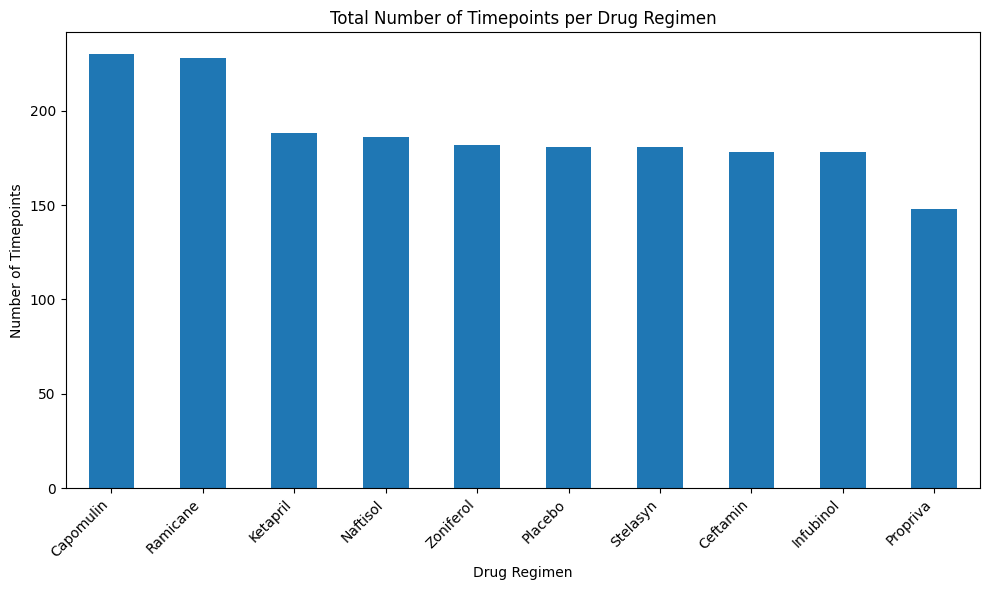

In [24]:
# prompt: # Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen.
timepoint_counts = clean_mouse_study_df.groupby('Drug Regimen')['Timepoint'].count()
timepoint_counts_sorted = timepoint_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
timepoint_counts_sorted.plot(kind='bar')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Total Number of Timepoints per Drug Regimen")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

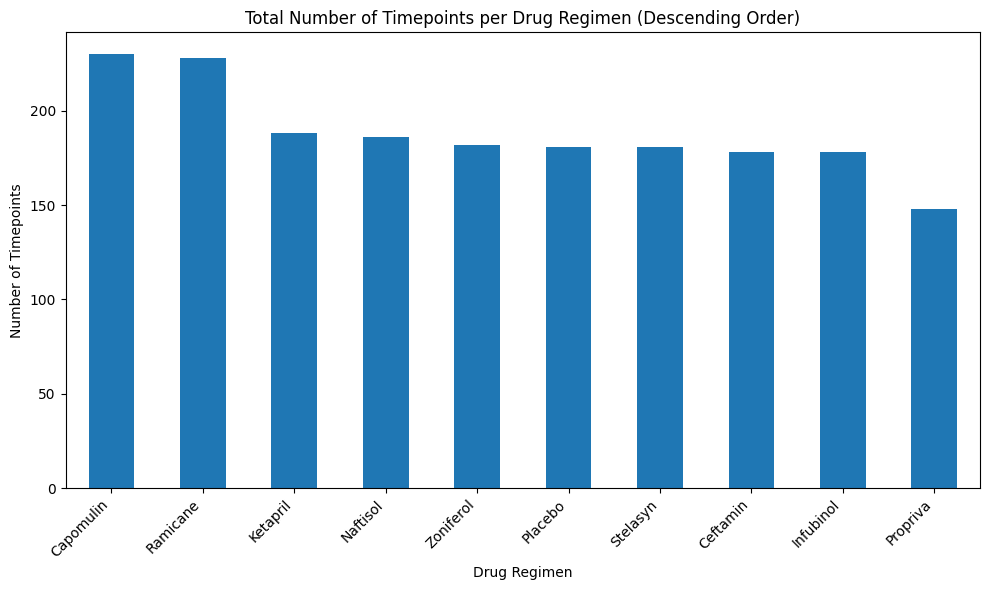

In [26]:
# prompt: # Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen.
timepoint_counts = clean_mouse_study_df.groupby('Drug Regimen')['Timepoint'].count()
timepoint_counts_sorted = timepoint_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
timepoint_counts_sorted.plot(kind='bar')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Total Number of Timepoints per Drug Regimen (Descending Order)")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

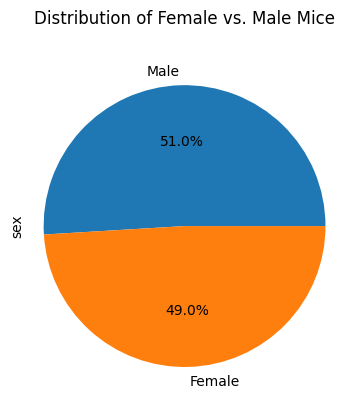

In [41]:
# prompt:  Generate a pie plot showing the distribution of female versus male mice using Pandas
# add gap after title

# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = clean_mouse_study_df['Sex'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Female vs. Male Mice\n", pad=20)
plt.ylabel("sex")
plt.axis('equal')
plt.show()

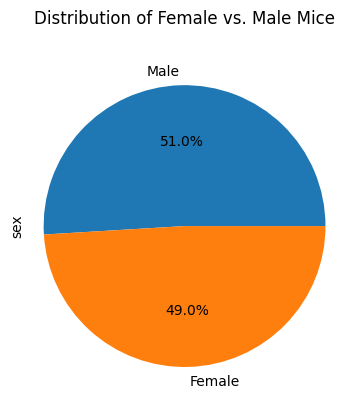

In [42]:
# prompt: Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_counts = clean_mouse_study_df['Sex'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Female vs. Male Mice\n", pad=20)
plt.ylabel("sex")
plt.axis('equal')
plt.show()

In [53]:
# prompt: # Calculate the final tumor volume of each mouse across four of the treatment regimens:
# # Capomulin, Ramicane, Infubinol, and Ceftamin
# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Create a groupby object to find the max timepoint for each mouse
max_timepoint_df = clean_mouse_study_df.groupby('Mouse ID')['Timepoint'].max()
# Merge the max timepoint data with the original DataFrame
merged_df = pd.merge(clean_mouse_study_df, max_timepoint_df, on=("Mouse ID", "Timepoint"), how="right")

# Create a list with the selected drug regimens
drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to store the tumor volume data for the selected drug regimens
tumor_volume_list = []

# Loop through each drug regimen in the list of selected regimens
for drug in drug_regimens:
    # Get the tumor volume data for each mouse at the last time point for each selected drug regimen
    tumor_volume = merged_df.loc[merged_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    # Append the tumor volume data for each selected drug regimen to the tumor_volume_list
    tumor_volume_list.append(tumor_volume)

# prompt: # Print the tumor volume data for each selected drug regimen
# #print(tumor_volume_list)

# Print the tumor volume data for each selected drug regimen
for i in range(len(drug_regimens)):
    print(f"Tumor volume data for {drug_regimens[i]}:")
    print(tumor_volume_list[i])
    print()

Tumor volume data for Capomulin:
19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64

Tumor volume data for Ramicane:
6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
70     29.128472
76     33.562402
77     36.374510
91     31.560470
93     36.134852
96     22.050126
119    30.564625
126    31.095335
157    45.220869
158    36.561652
166    37.225650
168    43.419381
177    30.276232
190    40.667713
217    43.166373
235    44.183451
244    30.638696
Name: Tumor Volume (mm3), dtype: float64

T

In [57]:
# prompt: # Put treatments into a list for  loop
# # Calculate the IQR and quantitatively determine if there are any potential outliers.


# Calculate the IQR and quantitatively determine if there are any potential outliers.
for i in range(len(drug_regimens)):
    quartiles = tumor_volume_list[i].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volume_list[i].loc[(tumor_volume_list[i] < lower_bound) | (tumor_volume_list[i] > upper_bound)]
    print(f"For {drug_regimens[i]}:")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"Potential outliers: {outliers}")
    print("------------------------------------------------------")

For Capomulin:
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
------------------------------------------------------
For Ramicane:
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
------------------------------------------------------
For Infubinol:
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
------------------------------------------------------
For Ceftamin:
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
------------------------------------------------------


<ipython-input-59-c8b259cd9258>:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_volume_list, labels=drug_regimens, flierprops={'markerfacecolor': 'red', 'marker': 'o'})  # Highlight outliers in red


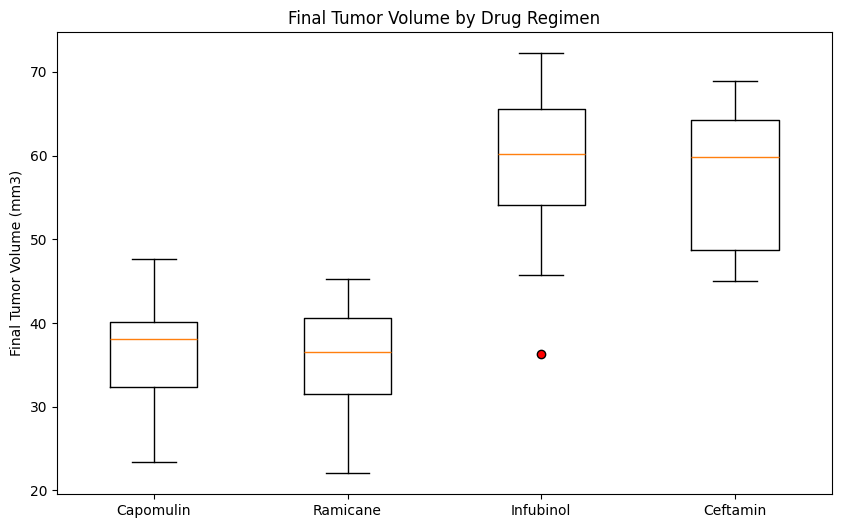

In [59]:
# prompt: # Generate a box plot that shows the distrubution of the tumor volume for each treatment group. remove the warning

import matplotlib.pyplot as plt


# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_list, labels=drug_regimens, flierprops={'markerfacecolor': 'red', 'marker': 'o'})  # Highlight outliers in red
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Final Tumor Volume by Drug Regimen')
plt.show()

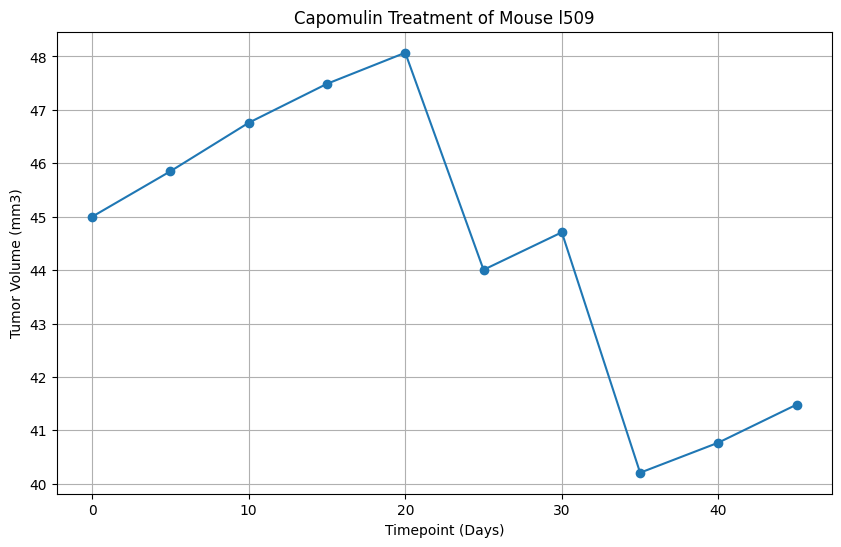

In [63]:
# prompt: # Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Assuming 'mouse_study_df' DataFrame is already defined and cleaned
capomulin_data = clean_mouse_study_df.loc[clean_mouse_study_df['Drug Regimen'] == "Capomulin"]

# Select a specific mouse from the Capomulin treatment group
mouse_id = "l509"  # Replace with an actual mouse ID from the dataset
mouse_data = capomulin_data.loc[capomulin_data['Mouse ID'] == mouse_id]

# Plot tumor volume vs. timepoint
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin Treatment of Mouse {mouse_id}')
plt.grid(True)
plt.show()

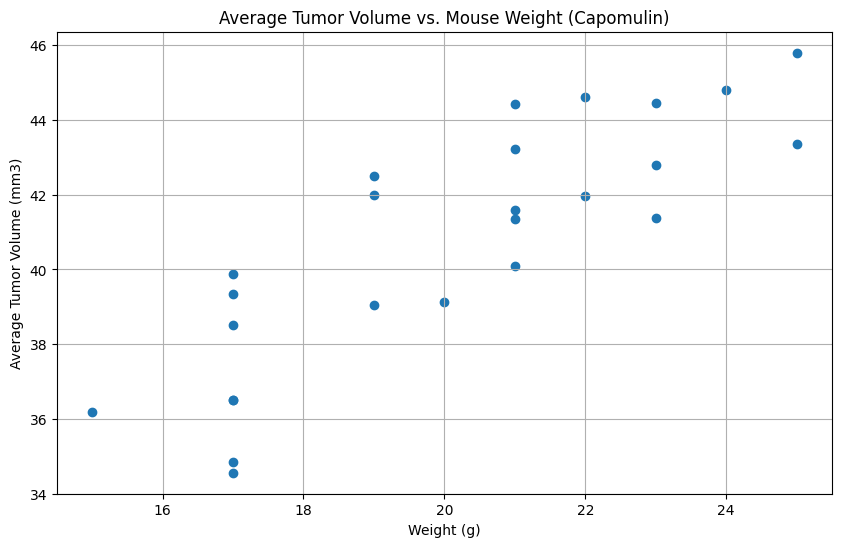

In [65]:
# prompt: # Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = clean_mouse_study_df.loc[clean_mouse_study_df['Drug Regimen'] == "Capomulin"]
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin)")
plt.grid(True)
plt.show()



The correlation between mouse weight and the average tumor volume is 0.84


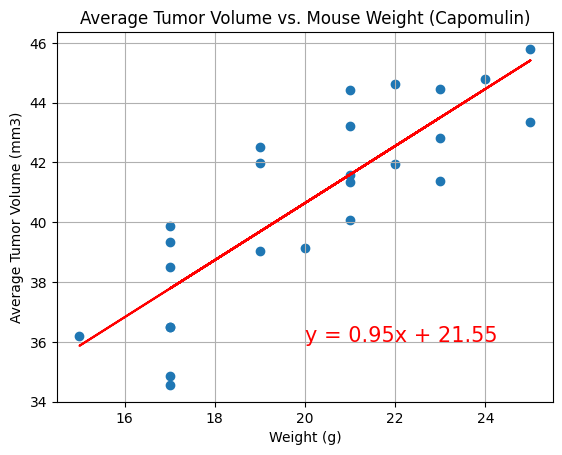

In [66]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_weights, average_tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weights, average_tumor_volume)
regress_values = mouse_weights * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weights,average_tumor_volume)
plt.plot(mouse_weights,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin)")
plt.grid(True)
plt.show()